In [3]:
import pandas as pd

In [4]:
text=['This is introduction to NLP','It is likely to be useful, to people ',
      'Machine learning is the new electrcity',
      'There would be less hype around AI and more action going forward',
      'python is the best tool!',
      'R is good langauage',
      'I like this book',
      'I want more books like this']

In [5]:
tweets = pd.DataFrame({'text':text})

In [6]:
tweets

,text
0,This is introduction to NLP
1,"It is likely to be useful, to people"
2,Machine learning is the new electrcity
3,There would be less hype around AI and more ac...
4,python is the best tool!
5,R is good langauage
6,I like this book
7,I want more books like this


# Lowering text

In [7]:
tweets['text'] = tweets['text'].apply(lambda x: x.lower())

In [8]:
tweets

,text
0,this is introduction to nlp
1,"it is likely to be useful, to people"
2,machine learning is the new electrcity
3,there would be less hype around ai and more ac...
4,python is the best tool!
5,r is good langauage
6,i like this book
7,i want more books like this


# Removing punctuation

In [9]:
tweets['text'] = tweets['text'].str.replace('[^\w\s]','')

In [10]:
s = 'Hell0!!! meeting you% is heaven..?!'

In [11]:
import re

In [12]:
re.sub(r'[^\w\s]','',s) # -- Totally works HAHAHA

'Hell0 meeting you is heaven'

# Removing Stopwords

In [13]:
# !pip install nltk

In [14]:
import nltk

In [15]:
# nltk.download()

In [16]:
from nltk.corpus import stopwords

In [17]:
stop = stopwords.words('english')

In [18]:
tweets['text'] = tweets['text'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop]))

In [19]:
tweets

,text
0,introduction nlp
1,likely useful people
2,machine learning new electrcity
3,would less hype around ai action going forward
4,python best tool
5,r good langauage
6,like book
7,want books like


# Standardizing Text

In [20]:
# 1. By using lookup table

In [21]:
lookup_dict = {'nlp':'natural language processing',
               'ur':'your', 
               "wbu" : "what about you"}

In [22]:
text = "I like nlp it's ur choice"

In [23]:
new_words = []

In [24]:
for word in text.split():
    word = re.sub(r'[^\w\s]','',word)
    if word.lower() in lookup_dict:
        word = lookup_dict[word.lower()]
        new_words.append(word)
        new_text = ' '.join(new_words)

# Spelling Correction

In [25]:
# Use textblob library

In [26]:
#!pip install textblob

In [27]:
from textblob import TextBlob

In [28]:
s = 'A.I. is the neq electrccty'

In [29]:
str(TextBlob(s).correct())

'A.I. is the new electricity'

# Stemming

In [30]:
from nltk.stem import PorterStemmer

In [31]:
st = PorterStemmer()

In [32]:
tweets['text'] = tweets['text'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))

In [33]:
tweets

,text
0,introduct nlp
1,like use peopl
2,machin learn new electrc
3,would less hype around ai action go forward
4,python best tool
5,r good langauag
6,like book
7,want book like


# Lemmatization

In [34]:
text=['I like fishing',
      'I eat fish',
      'There are many fishes in pound',
      'leaves and leaf']

In [35]:
tweets = pd.DataFrame({'text':text})

In [36]:
from textblob import Word

In [37]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\surie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
Word('fishes').lemmatize()

'fish'

In [39]:
tweets['text'] = tweets['text'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))

In [40]:
tweets

,text
0,I like fishing
1,I eat fish
2,There are many fish in pound
3,leaf and leaf


# Processing text

In [41]:
from nltk.corpus import webtext

In [42]:
nltk.download('webtext')

[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\surie\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!


True

In [43]:
wt_sentences = webtext.sents('firefox.txt')

In [44]:
wt_sentences

[['Cookie', 'Manager', ':', '"', 'Don', "'", 't', 'allow', 'sites', 'that', 'set', 'removed', 'cookies', 'to', 'set', 'future', 'cookies', '"', 'should', 'stay', 'checked', 'When', 'in', 'full', 'screen', 'mode', 'Pressing', 'Ctrl', '-', 'N', 'should', 'open', 'a', 'new', 'browser', 'when', 'only', 'download', 'dialog', 'is', 'left', 'open', 'add', 'icons', 'to', 'context', 'menu', 'So', 'called', '"', 'tab', 'bar', '"', 'should', 'be', 'made', 'a', 'proper', 'toolbar', 'or', 'given', 'the', 'ability', 'collapse', '/', 'expand', '.'], ['[', 'XUL', ']', 'Implement', 'Cocoa', '-', 'style', 'toolbar', 'customization', '.'], ...]

In [45]:
## CHeck Frequency Distribution

In [46]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords

In [47]:
import string

In [48]:
wt_words = webtext.words('firefox.txt')

In [49]:
# Check number of words in data

In [50]:
len(wt_words)

102457

In [51]:
# Compute the frequency of all words in the text file

In [52]:
freq_dist = nltk.FreqDist(wt_words)
freq_dist

FreqDist({'.': 2428, 'in': 2203, 'to': 2130, '"': 1971, 'the': 1762, "'": 1507, 'not': 1472, '-': 1372, 'when': 1255, 'on': 1193, ...})

In [53]:
large_words = dict([(k,v) for k,v in freq_dist.items() if len(k)>3])

In [54]:
large_words

{'Cookie': 22,
 'Manager': 179,
 'allow': 53,
 'sites': 63,
 'that': 145,
 'removed': 21,
 'cookies': 57,
 'future': 4,
 'should': 461,
 'stay': 21,
 'checked': 22,
 'When': 132,
 'full': 38,
 'screen': 101,
 'mode': 51,
 'Pressing': 9,
 'Ctrl': 96,
 'open': 479,
 'browser': 392,
 'when': 1255,
 'only': 139,
 'download': 297,
 'dialog': 330,
 'left': 75,
 'icons': 106,
 'context': 104,
 'menu': 462,
 'called': 16,
 'made': 16,
 'proper': 6,
 'toolbar': 364,
 'given': 15,
 'ability': 25,
 'collapse': 15,
 'expand': 29,
 'Implement': 25,
 'Cocoa': 1,
 'style': 40,
 'customization': 16,
 'ifdefs': 3,
 'MOZ_PHOENIX': 4,
 'customize': 39,
 'small': 45,
 'nightly': 28,
 'builds': 45,
 'tinderboxen': 1,
 'Phoenix': 186,
 'finish': 7,
 'tearing': 1,
 'prefs': 33,
 'pieces': 1,
 'then': 40,
 'make': 47,
 'suck': 3,
 'mozbrowser': 2,
 'script': 21,
 'doesn': 453,
 'start': 124,
 'correct': 17,
 'binary': 8,
 'Need': 47,
 'bookmark': 329,
 'groups': 11,
 'icon': 180,
 'Dropping': 2,
 'palette': 4

In [55]:
freq_dist = FreqDist(large_words)

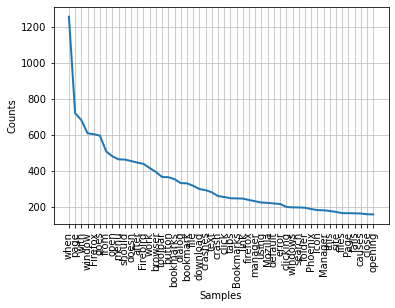

In [56]:
freq_dist.plot(50, cumulative=False)

In [57]:
# Build a wordcloud

In [58]:
#!pip install wordcloud

In [59]:
from wordcloud import WordCloud

In [60]:
wcloud = WordCloud()

In [64]:
# breaking bad
text = '''Three weeks earlier, on his 50th birthday, Walt wakes up before dawn and exercises while contemplating of a plaque on his wall commemorating his contributions to research that won a Nobel Prize. At breakfast, his pregnant wife, Skyler, hands him a plate of eggs topped by veggie bacon spelling out "50". They banter with their handicapped son, Walt Jr., who complains about the veggie bacon. Afterwards, Walt drops off Junior at J. P. Wynne High School, where Walt also works as a chemistry teacher. In class, Walt explains to his apathetic students how he regards chemistry as the study of change as well as matter.'''

one_unit = 72 pixels

1280*720p = 17 * 10

1920*1080p = 26 * 15

In [74]:
wcloud.generate(text)

In [85]:
wcloud.to_file('wc.png')

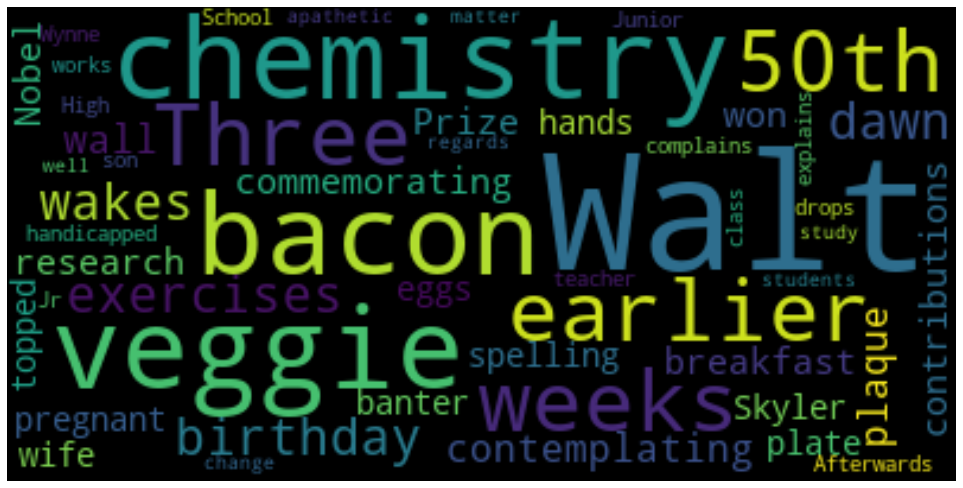

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# breaking bad
text = '''Three weeks earlier, on his 50th birthday, Walt wakes up before dawn and exercises while contemplating of a plaque on his wall commemorating his contributions to research that won a Nobel Prize. At breakfast, his pregnant wife, Skyler, hands him a plate of eggs topped by veggie bacon spelling out "50". They banter with their handicapped son, Walt Jr., who complains about the veggie bacon. Afterwards, Walt drops off Junior at J. P. Wynne High School, where Walt also works as a chemistry teacher. In class, Walt explains to his apathetic students how he regards chemistry as the study of change as well as matter.'''
wcloud = WordCloud().generate(text)
plt.figure(figsize=(17,10))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

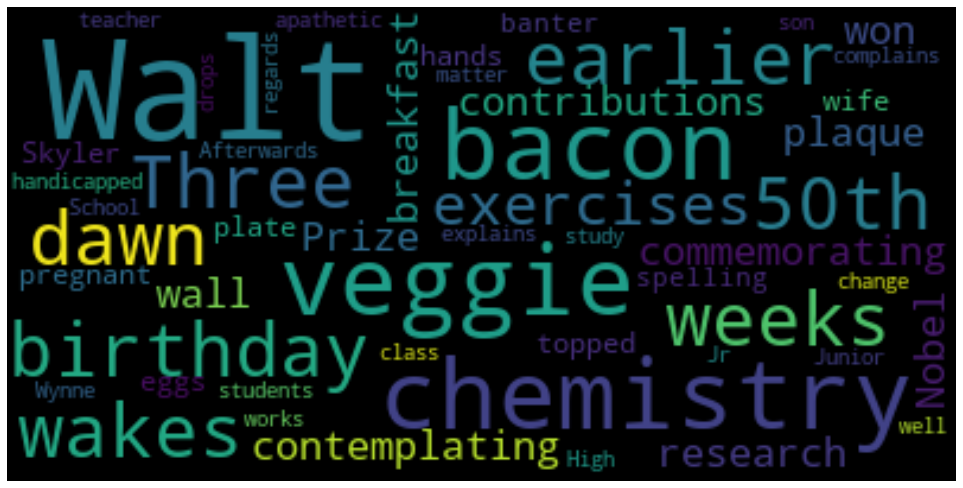

In [75]:
plt.figure(figsize=(17,10))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [61]:
wcloud.generate_from_frequencies(freq_dist)

In [62]:
import matplotlib.pyplot as plt

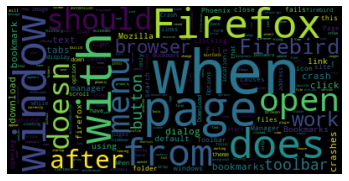

In [63]:
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

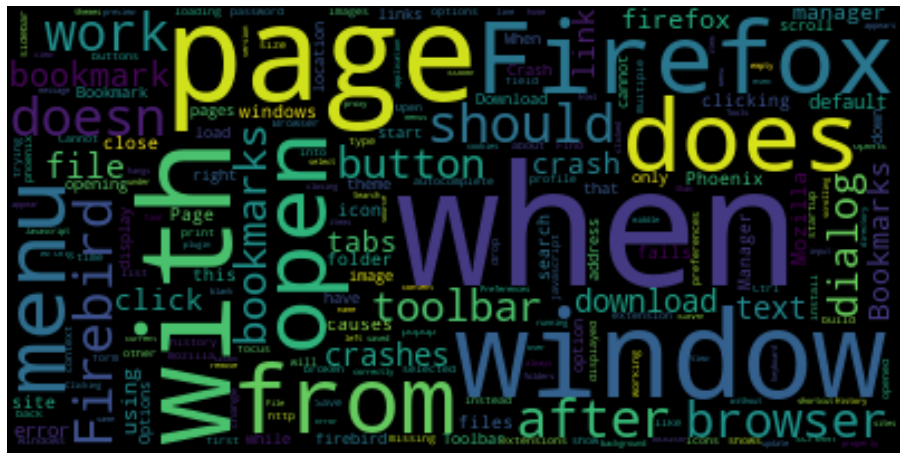

In [236]:
plt.figure(figsize=(16,9))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png')
plt.show()

In [243]:
wcloud = WordCloud(background_color='white')

In [248]:
text1 = '''In the desert outside of Albuquerque, New Mexico, a man wearing nothing but his underwear and a gas mask erratically drives an RV down a desolate highway. In the passenger seat, another man is passed out, also wearing a gas mask. In the back of the RV are two bodies. After crashing the RV in a ditch, the drivers climbs out, dons a shirt handing from the side view mirror, and retrieves a video camera and gun from the vehicle. Recording a message on the camera, the man identifies himself as Walter White and bids a cryptic farewell to his wife and son as sirens are heard in the distance. Walt then walks onto the road and awaits the apparent approach of police, gun in hand.'''

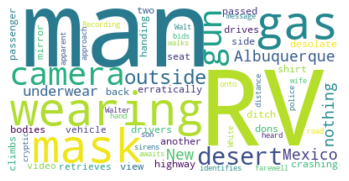

In [258]:
plt.imshow(wcloud.generate(text), interpolation='bilinear')
plt.axis('off')
plt.show()

In [259]:
text2 = '''Three weeks earlier, on his 50th birthday, Walt wakes up before dawn and exercises while contemplating of a plaque on his wall commemorating his contributions to research that won a Nobel Prize. At breakfast, his pregnant wife, Skyler, hands him a plate of eggs topped by veggie bacon spelling out "50". They banter with their handicapped son, Walt Jr., who complains about the veggie bacon. Afterwards, Walt drops off Junior at J. P. Wynne High School, where Walt also works as a chemistry teacher. In class, Walt explains to his apathetic students how he regards chemistry as the study of change as well as matter.'''

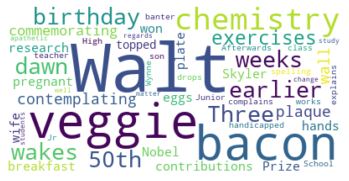

In [262]:
plt.imshow(wcloud.generate(text2), interpolation='bilinear')
plt.axis('off')
plt.show()

In [263]:
text3 = '''The following day, Walt steals boxes full of chemistry equipment from his high school, while Jesse arranges to buy a used RV so that will be used as the duo's mobile meth lab. Upon driving into the desert, Walt strips down to his underwear (so as not to contaminate his clothes with chemical odors) and cooks his first batch of crystal methamphetamine. Jesse is astonished with the chemical purity of the product Walt has produced.

Jesse takes a sample of Walt's meth to Krazy-8, a mid-level drug distributor who happens to be the cousin of his Jesse's partner, Emilio Koyama. Emilio, who was arrested in Hank's bust and is now out on bail, believes that Jesse ratted him out. The three then drive out to the RV, where Krazy-8 asks Walt if he wants to switch allegiances. Before he can answer, Emilio recognizes Walt from the bust and begins threatening him. Jesse tries to flee, but trips and knocks himself out on a rock. Walt barters for his life by promising to reveal his meth formula.'''

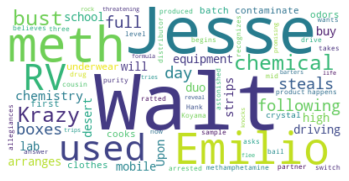

In [265]:
plt.imshow(wcloud.generate(text3), interpolation='bilinear')
plt.axis('off')
plt.show()

# A end-to-end text processing pipeline

In [285]:
text= '''How to take control of your #debt https://personal.vanguard.com/us/insights/saving-investing/debt-management. #Best advice for #family #financial #success(@PrepareToWin)'''

In [286]:
text

'How to take control of your #debt https://personal.vanguard.com/us/insights/saving-investing/debt-management. #Best advice for #family #financial #success(@PrepareToWin)'

In [287]:
## Pipeline will be

1. Lower
2. Remove Unicode
3. Convert url & username to 'URL' and 'AT_USER'
4. Remove additional whitespaces
5. Remove symbols which are not alphanumeric
6. Remove hashtag
7. Remove multiple question marks
8. Remove multiple exclamation marks
9. Remove multiple fullstops
10. Lemmatization
11. Stemming

In [311]:
# 1. lower
text.lower()

'how to take control of your #debt https://personal.vanguard.com/us/insights/saving-investing/debt-management. #best advice for #family #financial #success(@preparetowin)'

In [313]:
# 2. remove unicode
# 3. convert username and url

In [318]:
# 4. Remove additional whitespaces
text = re.sub(r'[\s]+',' ',text)
text

'How to take control of your #debt https://personal.vanguard.com/us/insights/saving-investing/debt-management. #Best advice for #family #financial #success(@PrepareToWin)'

In [321]:
# 5. Remove symbols which are not alphanumeric
re.sub(r'[^\w]+',' ',text)

'How to take control of your debt https personal vanguard com us insights saving investing debt management Best advice for family financial success PrepareToWin '

In [327]:
# 6. Remove hashtag
re.sub(r'#[\s]','','# My # first # code')

'My first code'

In [335]:
# 6. Remove hashtag
re.sub(r'#([\w]+)',r'\1','#Firstlove #Firstforgiveness')

'Firstlove Firstforgiveness'

In [342]:
# 7. Remove multiplee question marks
re.sub(r'[?]+','', 'what the fuck? bro ??')

'what the fuck bro '

In [344]:
# 8. Remove multiple exclamation marks
re.sub(r'[!]+','', 'Hi!!! Have a great day..!!!')

'Hi Have a great day..'

In [347]:
# 9. Remove multiple fullstops
re.sub(r'[.]+','', 'Now... Training... model...')

'Now Training model'

In [351]:
# 10. Lemmatization
from textblob import Word
text = 'Summer has come and passed, the innocents can never last. Wake me up when september ends'

In [352]:
' '.join([Word(word).lemmatize() for word in text.split()])

'Summer ha come and passed, the innocent can never last. Wake me up when september end'

In [371]:
Word('he has fishes').lemmatize()

'he has fishes'

In [372]:
Word('he').lemmatize(),Word('has').lemmatize(),Word('fishes').lemmatize()

('he', 'ha', 'fish')

In [373]:
# 11. Stemming

In [374]:
from nltk.stem import PorterStemmer

In [375]:
stem = PorterStemmer()

In [394]:
stem.stem('stemming')

'stem'

In [76]:
from nltk.stem import WordNetLemmatizer

In [78]:
lm = WordNetLemmatizer()

In [82]:
lm.lemmatize('fishes')

'fish'

Help on method generate in module wordcloud.wordcloud:

generate(text) method of wordcloud.wordcloud.WordCloud instance
    Generate wordcloud from text.
    
    The input "text" is expected to be a natural text. If you pass a sorted
    list of words, words will appear in your output twice. To remove this
    duplication, set ``collocations=False``.
    
    Alias to generate_from_text.
    
    Calls process_text and generate_from_frequencies.
    
    Returns
    -------
    self



In [1]:
from nltk.stem import WordNetLemmatizer

In [2]:
lm = WordNetLemmatizer()

In [3]:
lm.lemmatize('structur')

'structur'

In [4]:
len('structure')

9

In [5]:
len('''Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised.[1][2][3]

Deep learning architectures such as deep neural networks, deep belief networks, recurrent neural networks and convolutional neural networks have been applied to fields including computer vision, machine vision, speech recognition, natural language processing, audio recognition, social network filtering, machine translation, bioinformatics, drug design, medical image analysis, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.[4][5][6]

Artificial neural networks (ANNs) were inspired by information processing and distributed communication nodes in biological systems. ANNs have various differences from biological brains. Specifically, neural networks tend to be static and symbolic, while the biological brain of most living organisms is dynamic (plastic) and analog.[7][8][9]

The adjective "deep" in deep learning comes from the use of multiple layers in the network. Early work showed that a linear perceptron cannot be a universal classifier, and then that a network with a nonpolynomial activation function with one hidden layer of unbounded width can on the other hand so be. Deep learning is a modern variation which is concerned with an unbounded number of layers of bounded size, which permits practical application and optimized implementation, while retaining theoretical universality under mild conditions. In deep learning the layers are also permitted to be heterogeneous and to deviate widely from biologically informed connectionist models, for the sake of efficiency, trainability and understandability, whence the "structured" part.''')

1900